In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [ ]:
model = keras.Sequential([
                          Flatten(input_shape=(28, 28, 1)),
                          Dense(128, activation='relu'),
                          Dense(10, activation='softmax')
])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2826 - accuracy: 0.9191 - val_loss: 0.1596 - val_accuracy: 0.9530
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1278 - accuracy: 0.9630 - val_loss: 0.1163 - val_accuracy: 0.9660
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0885 - accuracy: 0.9739 - val_loss: 0.0956 - val_accuracy: 0.9699
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0653 - accuracy: 0.9810 - val_loss: 0.0848 - val_accuracy: 0.9750
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9843 - val_loss: 0.1062 - val_accuracy: 0.9715


In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9719


[0.09099435806274414, 0.9718999862670898]

[[4.32440714e-07 3.22865380e-11 1.09711443e-07 3.56210330e-05
  1.54519597e-09 1.18763157e-04 4.84106010e-07 1.17925547e-09
  9.99833465e-01 1.11266045e-05]]
Распознанная цифра: 8


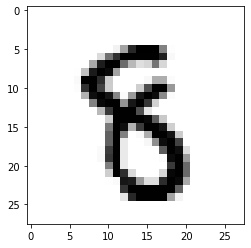

In [ ]:
n = 7694
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)
print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(281, 28, 28)


Значение сети: 6


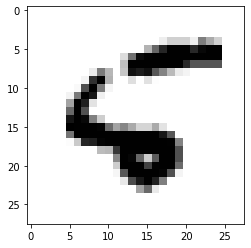

Значение сети: 9


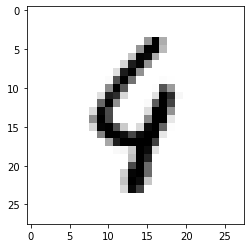

Значение сети: 2


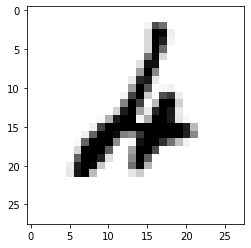

Значение сети: 1


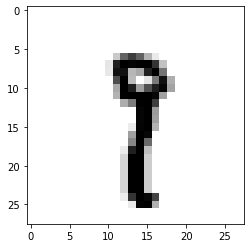

Значение сети: 7


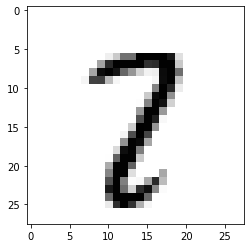

In [ ]:
for i in range(5):
  print(f'Значение сети: {str(p_false[i])}')
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()